In [81]:
import json
import pandas as pd
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [82]:
def extract_values(obj, key="value"):
    values = []
    if isinstance(obj, dict):
        for k, v in obj.items():
            if k == key:
                values.append(str(v))
            else:
                values.extend(extract_values(v, key))
    elif isinstance(obj, list):
        for item in obj:
            values.extend(extract_values(item, key))
    return values

def wrap_text(text, width=30):
    return '\n'.join([text[i:i+width] for i in range(0, len(text), width)])


def ocr_json_text(json_path):
    if json_path[-4:]=='json':
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
            data_list=data.get('pages')[-1].get('blocks')
            if data_list:
                values = extract_values(data_list[0])
                text = " ".join(values)
                text=text.replace(' 0','')
                text=wrap_text(text)
                return text
            
            else:
                return 'None'
    else:
        df=pd.read_csv(json_path,header=1)
        return df

def show_result(ocr_crop_img,ocr_results):
    for img_path,ocr_json in zip(ocr_crop_img,ocr_results):
        img=cv2.imread(img_path)
        ocr_text=ocr_json_text(ocr_json)

        plt.figure()
        fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,10))
        ax1.imshow(img)
        
        title=img_path.split('\\')[-1]
        ax1.set_title(title)
        if type(ocr_text)==str:
            ax2.text(0.5, 0.5, ocr_text,
            transform=ax2.transAxes,  
            ha='center', va='center',  
            fontsize=15)

        else:
            table=ax2.table(cellText=ocr_text.values,
                    colLabels=ocr_text.columns,
                    loc='center')
            table.auto_set_font_size(False)
            table.set_fontsize(8)
            table.scale(1, 7)
            ax2.axis('off')

        ax2.set_title('OCR Results')

    
        plt.show()
        plt.close()

In [83]:
root_path='E:/glass_git/AI-portfolio/OCR/result'
json_list=glob.glob(root_path+'/ocr_*.json')
png_list=glob.glob(root_path+'/*.png')
table_csv_list=glob.glob(root_path+'/*.csv')

ocr_results=json_list[1:]+table_csv_list
ocr_crop_img=png_list[1:-1]

<Figure size 640x480 with 0 Axes>

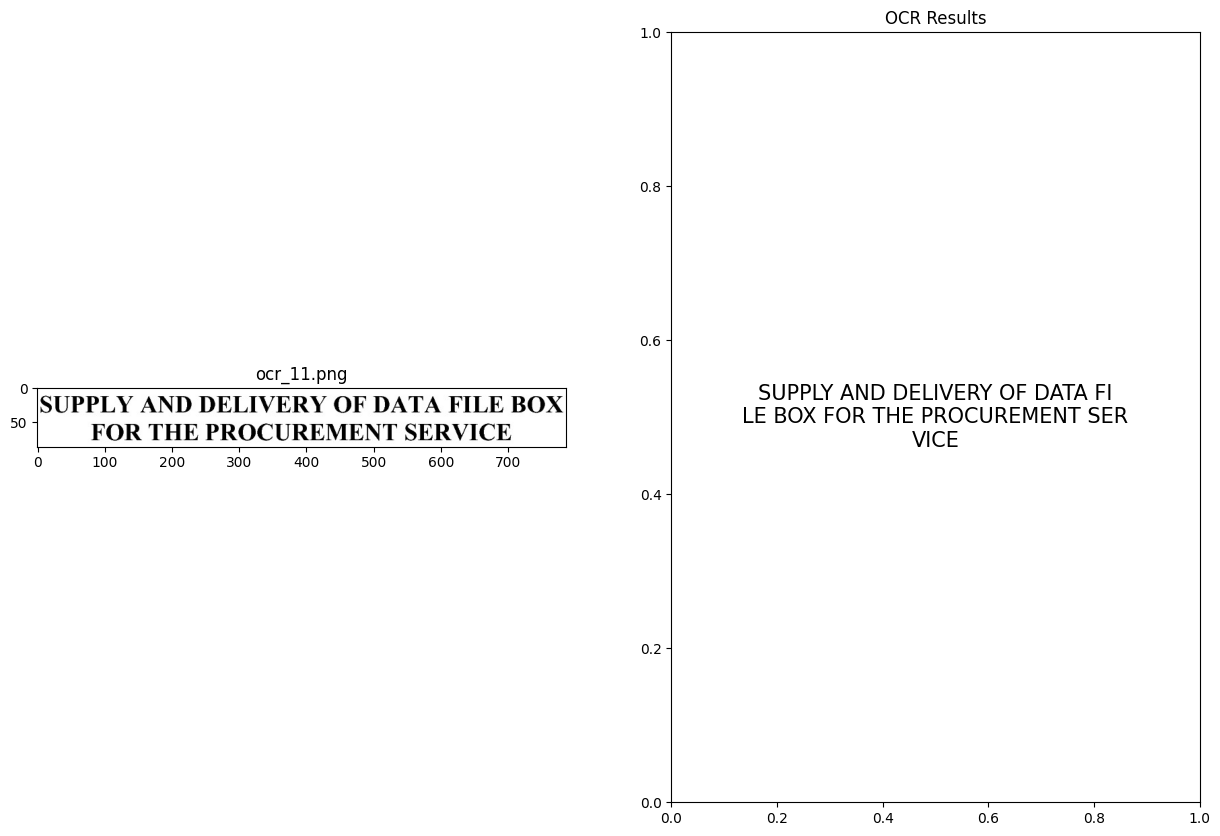

<Figure size 640x480 with 0 Axes>

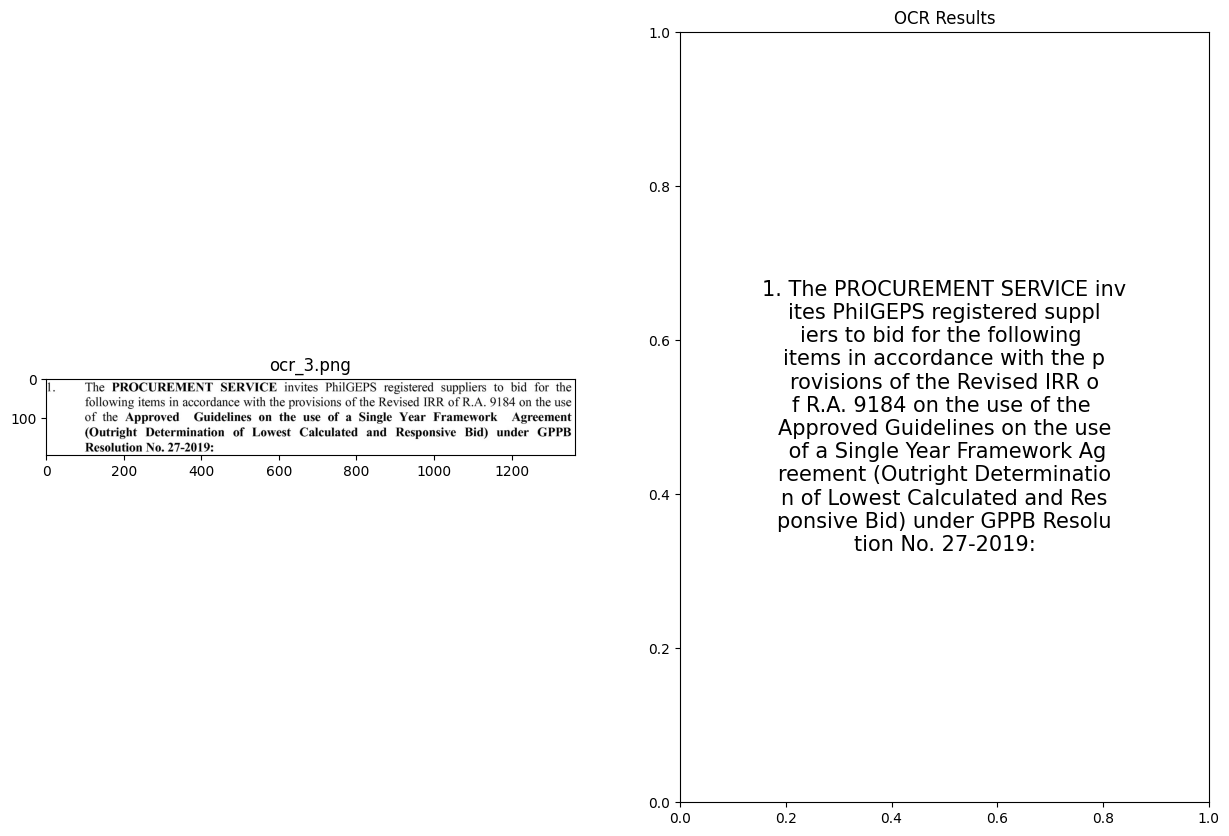

<Figure size 640x480 with 0 Axes>

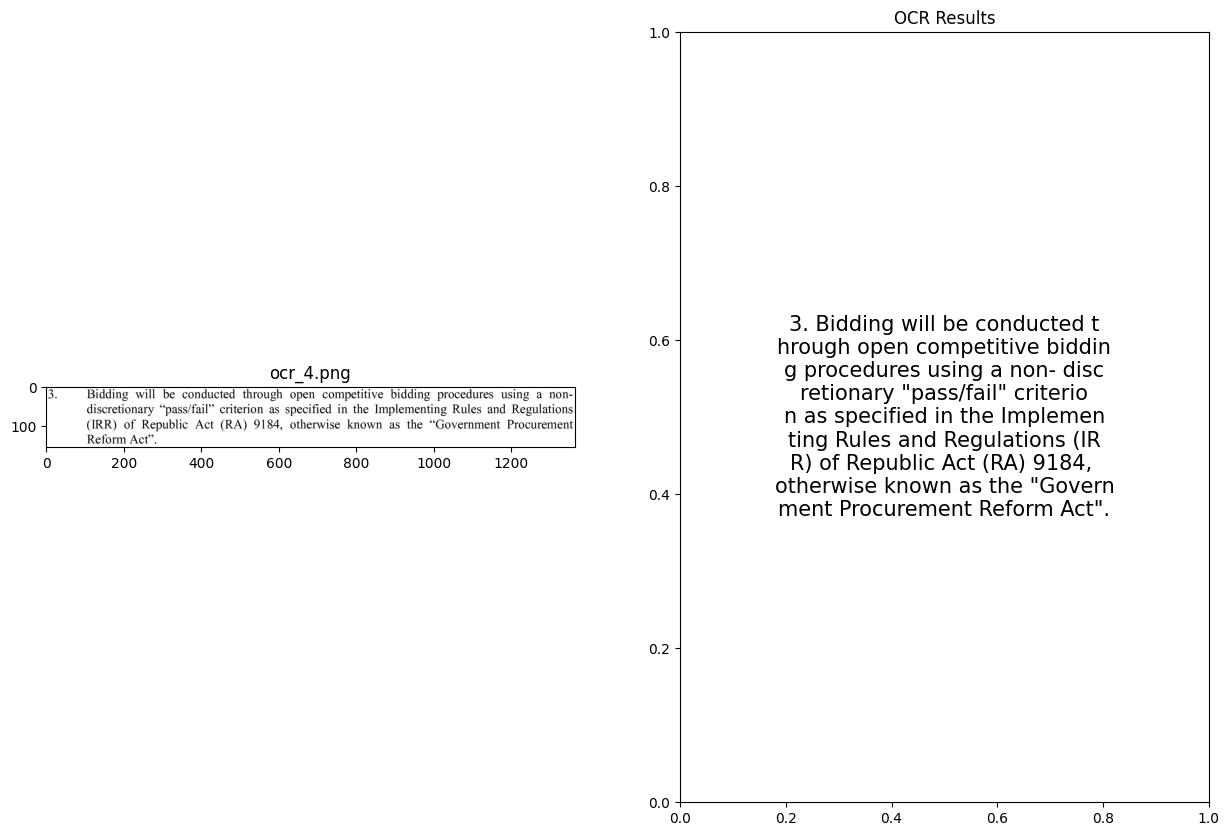

<Figure size 640x480 with 0 Axes>

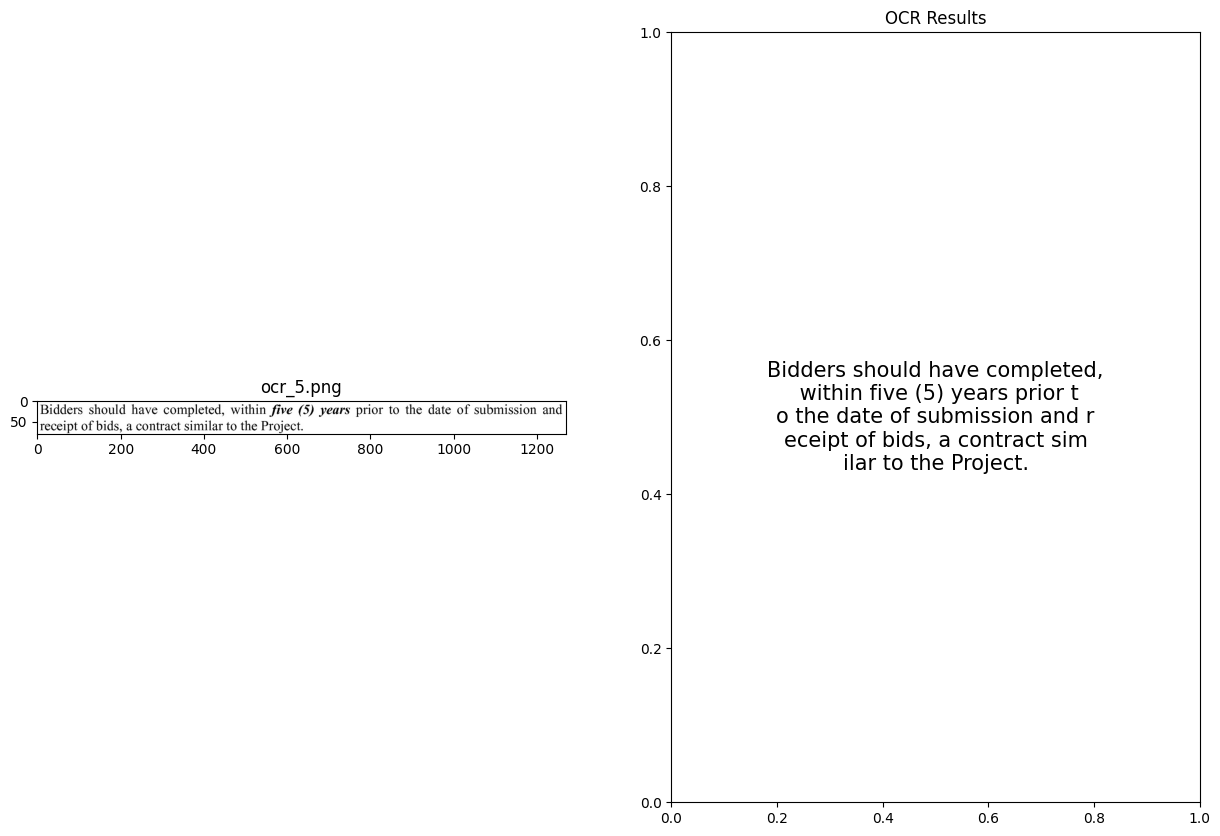

<Figure size 640x480 with 0 Axes>

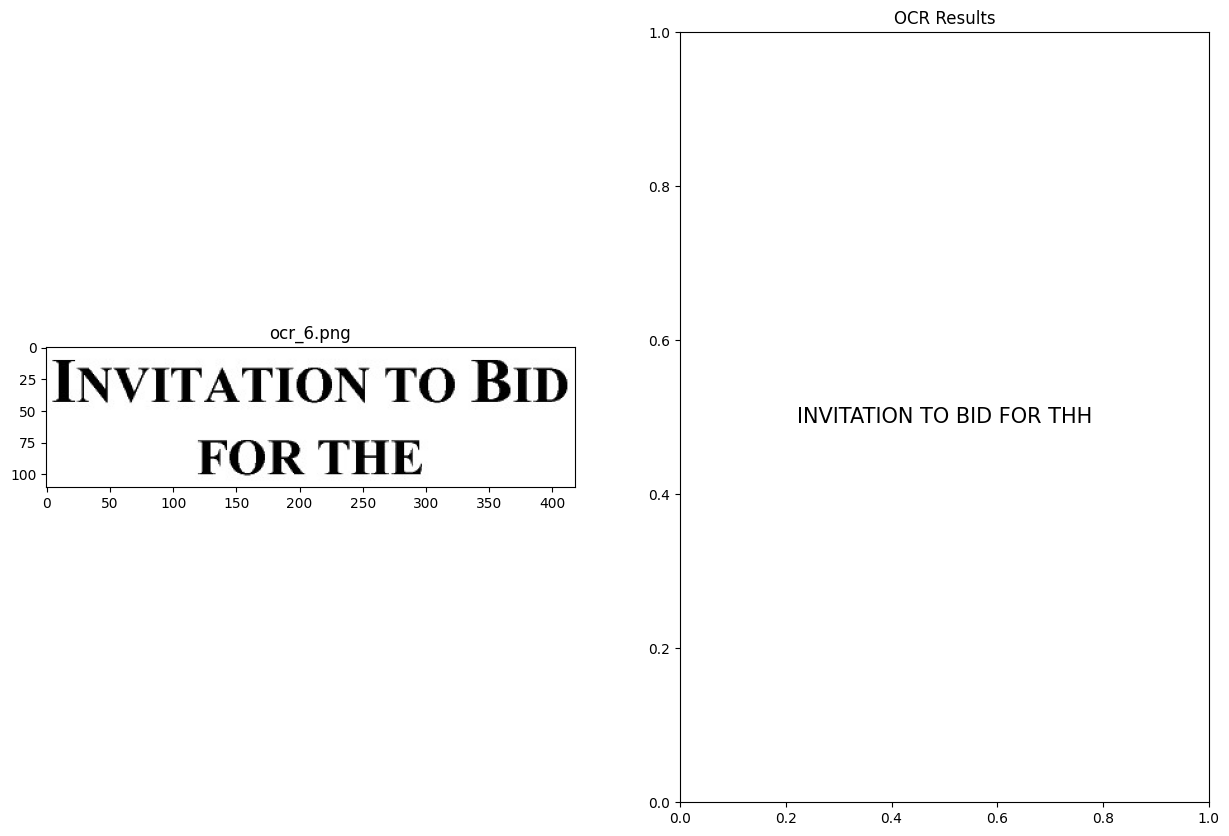

<Figure size 640x480 with 0 Axes>

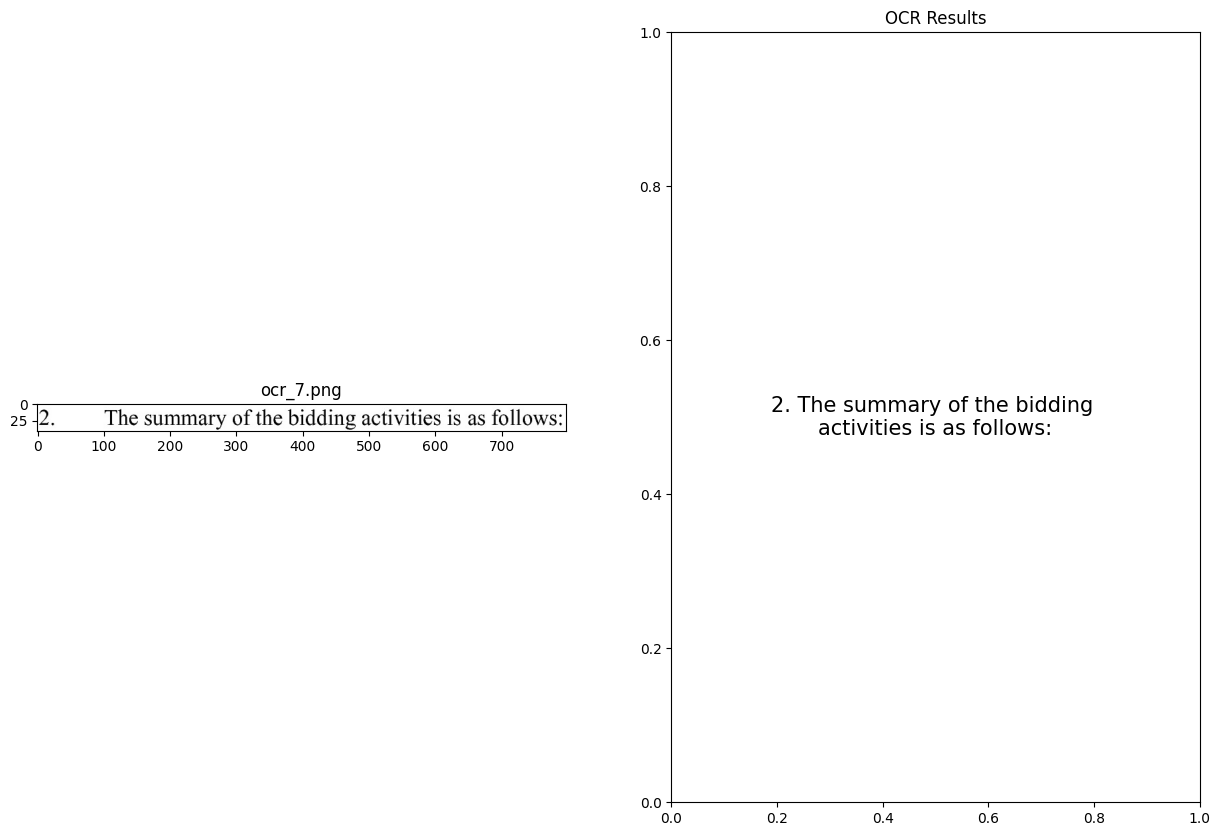

<Figure size 640x480 with 0 Axes>

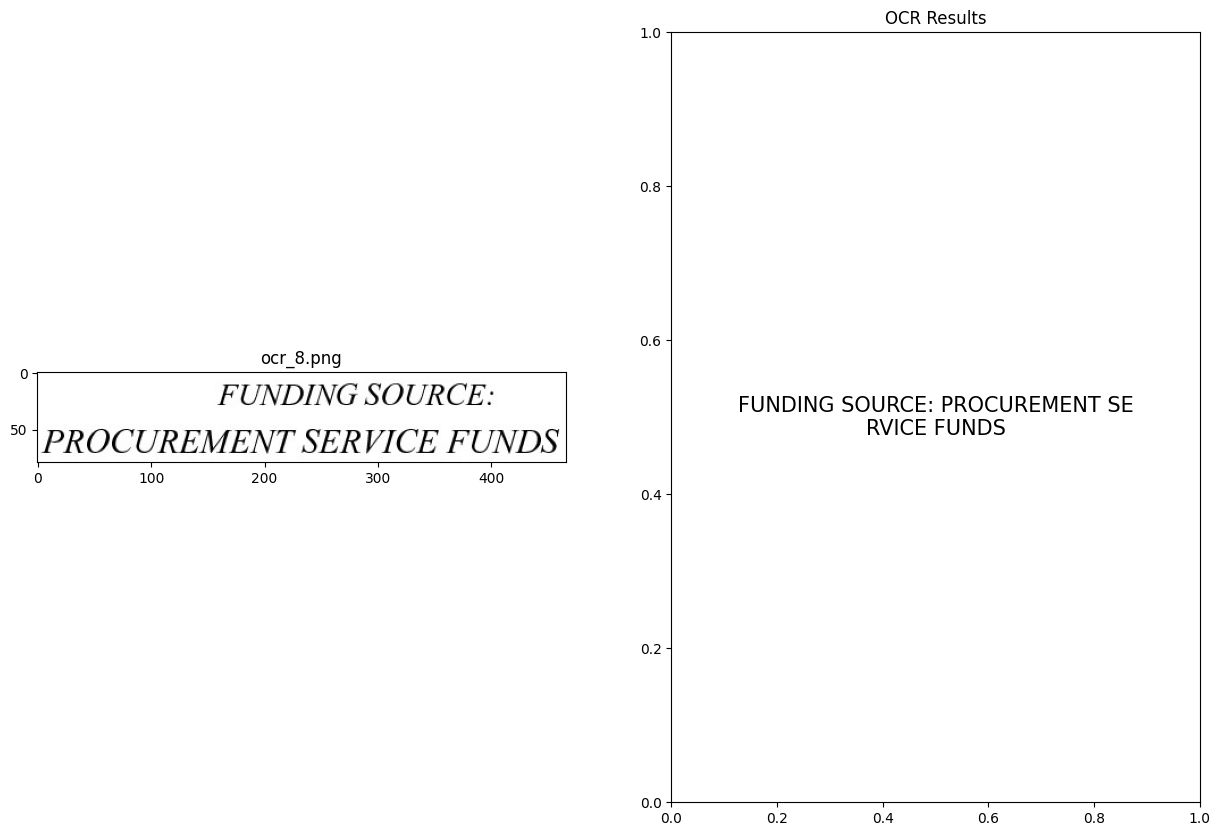

<Figure size 640x480 with 0 Axes>

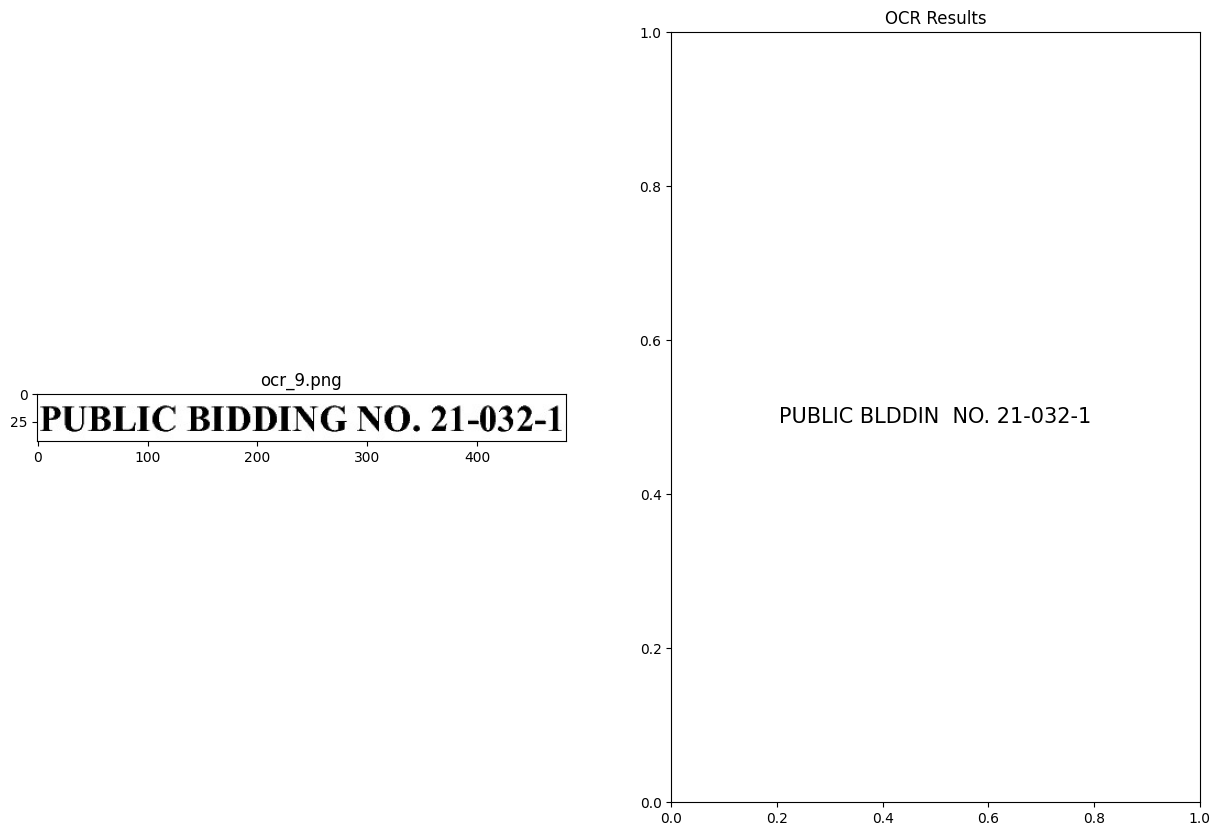

<Figure size 640x480 with 0 Axes>

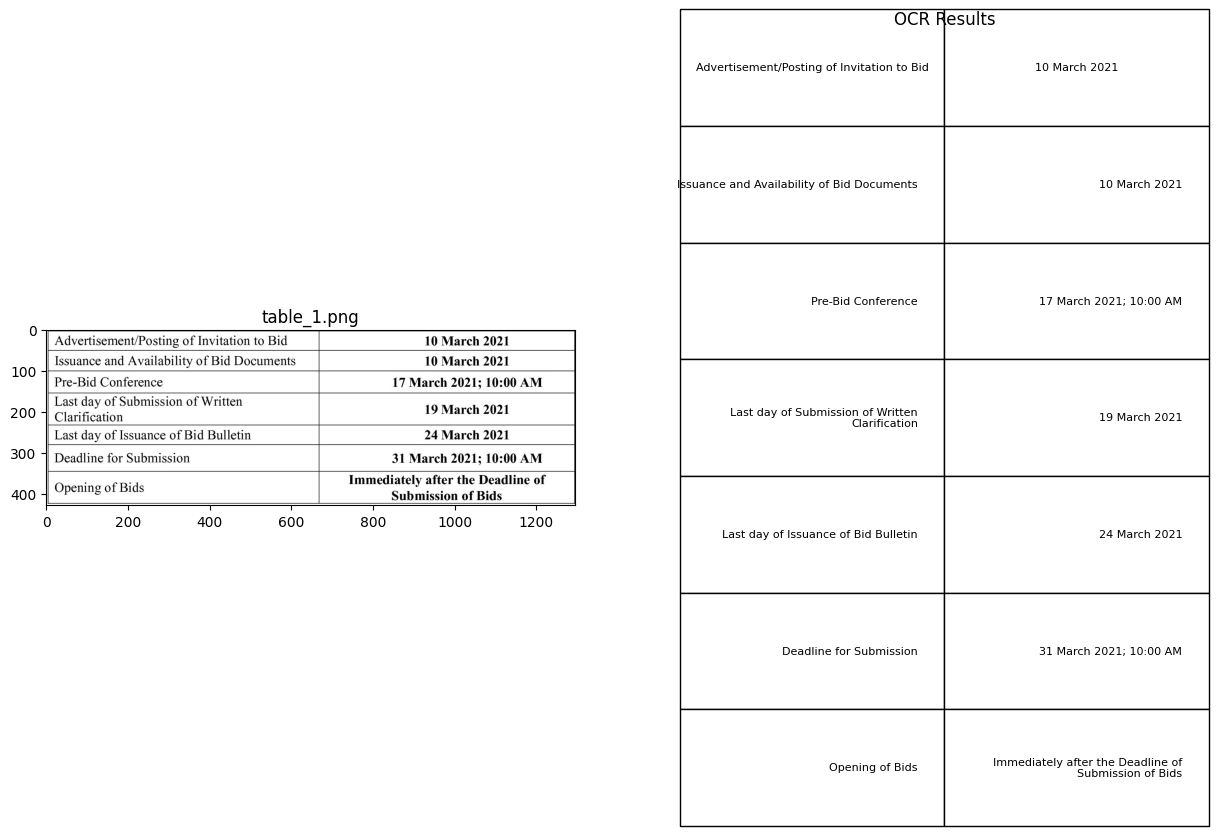

<Figure size 640x480 with 0 Axes>

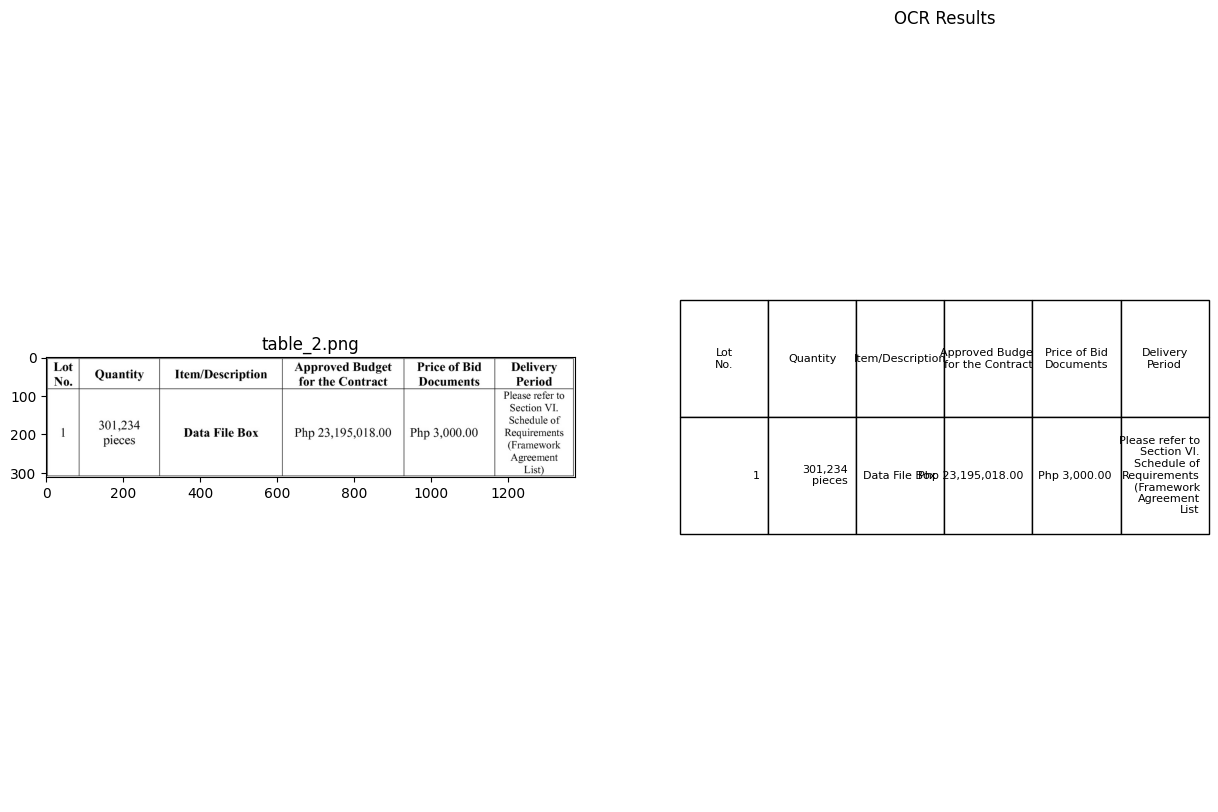

In [84]:
show_result(ocr_crop_img,ocr_results)